<a href="https://colab.research.google.com/github/emiliawisnios/Machine_Learning_Masters/blob/main/Lab_1_MSLE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear regression 

In this exercise you will use linear regression to predict flat prices. Training will be handled via gradient descent and we will:
* have multiple features (i.e. variables used to make the prediction),
* employ some basic feature engineering,
* work with a non-standard loss function.

Let's start with getting the data.

In [1]:
%matplotlib inline

!wget -O mieszkania.csv https://www.dropbox.com/s/zey0gx91pna8irj/mieszkania.csv?dl=1
!wget -O mieszkania_test.csv https://www.dropbox.com/s/dbrj6sbxb4ayqjz/mieszkania_test.csv?dl=1

--2021-10-26 22:45:04--  https://www.dropbox.com/s/zey0gx91pna8irj/mieszkania.csv?dl=1
Resolving www.dropbox.com (www.dropbox.com)... 162.125.80.18, 2620:100:6035:18::a27d:5512
Connecting to www.dropbox.com (www.dropbox.com)|162.125.80.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/dl/zey0gx91pna8irj/mieszkania.csv [following]
--2021-10-26 22:45:05--  https://www.dropbox.com/s/dl/zey0gx91pna8irj/mieszkania.csv
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc80968df50fe54649e5e88269dc.dl.dropboxusercontent.com/cd/0/get/BYxlHWBfrrqKeaA_TJVGCKyjNaUKCo16WAow3fmEd0zUxHld8GidPuRfrpUp1l8MZNIvCflPnKQtuyWuZm96fAUjBffCnbDJwGbmRww58ucZ33_71EJ1BQNuZuxGLgwqU2UGlo-2RORudwTap_trW7H6/file?dl=1# [following]
--2021-10-26 22:45:05--  https://uc80968df50fe54649e5e88269dc.dl.dropboxusercontent.com/cd/0/get/BYxlHWBfrrqKeaA_TJVGCKyjNaUKCo16WAow3fmEd0zUxHld8GidPuRfrpUp1l8MZNIvCflPnKQtuyW

In [2]:
!head mieszkania.csv mieszkania_test.csv

==> mieszkania.csv <==
m2,dzielnica,ilość_sypialni,ilość_łazienek,rok_budowy,parking_podziemny,cena
104,mokotowo,2,2,1940,1,780094
43,ochotowo,1,1,1970,1,346912
128,grodziskowo,3,2,1916,1,523466
112,mokotowo,3,2,1920,1,830965
149,mokotowo,3,3,1977,0,1090479
80,ochotowo,2,2,1937,0,599060
58,ochotowo,2,1,1922,0,463639
23,ochotowo,1,1,1929,0,166785
40,mokotowo,1,1,1973,0,318849

==> mieszkania_test.csv <==
m2,dzielnica,ilość_sypialni,ilość_łazienek,rok_budowy,parking_podziemny,cena
71,wolowo,2,2,1912,1,322227
45,mokotowo,1,1,1938,0,295878
38,mokotowo,1,1,1999,1,306530
70,ochotowo,2,2,1980,1,553641
136,mokotowo,3,2,1939,1,985348
128,wolowo,3,2,1983,1,695726
23,grodziskowo,1,1,1975,0,99751
117,mokotowo,3,2,1942,0,891261
65,ochotowo,2,1,2002,1,536499


Each row in the data represents a separate property. Our goal is to use the data from `mieszkania.csv` to create a model that can predict a property's price (i.e. `cena`) given its features (i.e. `m2,dzielnica,ilosc_sypialni,ilosc_lazienek,rok_budowy,parking_podziemny`). 

From now on, we should interfere only with `mieszkania.csv` (dubbed the training dataset) to make our decisions and create the model. The (only) purpose of `mieszkania_test.csv` is to test our model on **unseen** data.

Our predictions should minimize the so-called mean squared logarithmic error:
$$
MSLE = \frac{1}{n} \sum_{i=1}^n (\log(1+y_i) - \log(1+p_i))^2,
$$
where $y_i$ is the ground truth, and $p_i$ is our prediction.

Let's start with implementing the loss function.

In [3]:
import pandas as pd
import numpy as np

In [4]:
train = pd.read_csv('mieszkania.csv')
test = pd.read_csv('mieszkania_test.csv')

total = pd.concat([train,test])

total = pd.get_dummies(total, prefix='dzielnica')

train = total[:len(train)]
test = total[len(train):]

In [5]:
total

,m2,ilość_sypialni,ilość_łazienek,rok_budowy,parking_podziemny,cena,dzielnica_grodziskowo,dzielnica_mokotowo,dzielnica_ochotowo,dzielnica_wolowo
0,104,2,2,1940,1,780094,0,1,0,0
1,43,1,1,1970,1,346912,0,0,1,0
2,128,3,2,1916,1,523466,1,0,0,0
3,112,3,2,1920,1,830965,0,1,0,0
4,149,3,3,1977,0,1090479,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
195,22,1,1,1985,1,146077,0,1,0,0
196,123,3,2,1986,1,857546,0,1,0,0
197,89,2,2,1922,1,508225,0,0,0,1
198,40,1,1,1959,0,208683,0,0,0,1


In [6]:
def msle(ys, ps):
    assert len(ys) == len(ps)
    #################################
    # TODO: Implement this function #
    #################################
    sum = 0
    for i in range(len(ys)):
        sum += (np.log(1 + ys[i]) - np.log(1 + ps[i])) ** 2
    return sum/len(ys)

The simplest model is predicting the same constant for each instance. Test your implementation of msle against outputing the mean price.

In [7]:
###################################################
# TODO: Compute msle for outputing the mean price #
###################################################
len_train = len(train)
len_test = len(test)

train_mean = np.mean(train['cena'])
msle_train = msle(train['cena'], np.full(len_train, fill_value=train_mean))
msle_test = msle(test['cena'], np.full(len_test, fill_value=train_mean))

print(f'Training set mean: {train_mean}')
print(f'MSLE for training set: {msle_train}')
print(f'MSLE for test set: {msle_test}')

Training set mean: 507919.49
MSLE for training set: 0.3915253538257009
MSLE for test set: 0.4284115392580848


Recall that outputing the mean minimzes $MSE$. However, we're now dealing with $MSLE$.

Think of a constant that should result in the lowest $MSLE$.

In [8]:
#############################################
# TODO: Find this constant and compute msle #
#############################################

# log(1 + c) = (log(1+y1) + ... + log(1+yn))/n

c = np.exp(np.mean(np.log(1+ train['cena']))) -1
msle_train_best = msle(train['cena'], np.full(len_train,c))
msle_test_best = msle(test['cena'], np.full(len_test, c))
print(f'MSLE for best constant (training set): {msle_train_best}')
print(f'MSLE for best constant (test set): {msle_test_best}')

MSLE for best constant (training set): 0.3648896122133587
MSLE for best constant (test set): 0.42757520337601745


Now, let's implement a standard linear regression model. 

In [9]:
def generate_sets(train, test):

  train_y = train['cena'].to_numpy()
  test_y = test['cena'].to_numpy()

  train_x = train.drop('cena', axis=1)
  test_x = test.drop('cena', axis=1)

  mean = train_x.mean().to_numpy()
  std = train_x.std().to_numpy()

  # scaling and centralizing 
  train_x = (train_x - mean) / std
  # adding bias
  train_x = np.hstack((np.ones_like(train_x), train_x))


  # scaling and centralizing 
  test_x = (test_x - mean) / std
  # adding bias
  test_x = np.hstack((np.ones_like(test_x), test_x))

  return train_x, train_y, test_x, test_y

  
train_x, train_y, test_x, test_y = generate_sets(train, test)

In [10]:
##########################################################
# TODO: Implement linear regression and compute its msle #
##########################################################

class Linear_Regression:
  def __init__(self, lr, n_epoch, n):
    self.lr = lr
    self.n_epoch = n_epoch
    self.n = n

  def evaluate(self, weights, x, y):
    predictions = np.dot(x, weights)
    return np.mean((y - predictions)**2)

  def fit(self, x, y):
    # better initialization with weights from normal distributions
    weights = np.random.normal(size=x.shape[1])

    for i in range(self.n_epoch):
      preds = np.dot(x, weights)
      gradient = (2/self.n) * np.dot(x.T, preds - y)
      weights -= self.lr * gradient

      if i % 10000 == 0:
        loss = self.evaluate(weights, x, y)
        print(f'Iter: {i}      Loss:{round(loss, 4)}')
    
    return weights

In [11]:
lin_reg = Linear_Regression(0.001, 100000, len(train_y))
lin_reg_weights = lin_reg.fit(train_x, train_y)
preds_lin_reg = np.dot(test_x, lin_reg_weights)
print(f'MSLE for regression: {msle(test_y, preds_lin_reg)}')

Iter: 0      Loss:321878222932.3198
Iter: 10000      Loss:4158726525.2437
Iter: 20000      Loss:3910095338.4214
Iter: 30000      Loss:3874334405.6763
Iter: 40000      Loss:3869190073.4119
Iter: 50000      Loss:3868450043.566
Iter: 60000      Loss:3868343587.7337
Iter: 70000      Loss:3868328273.6969
Iter: 80000      Loss:3868326070.7202
Iter: 90000      Loss:3868325753.8144
MSLE for regression: 0.18097954587280274


Note that the loss function that the algorithms optimizes (i.e $MSE$) differs from $MSLE$. We've already seen that this may result in a suboptimal solution.

How can you change the setting so that we optimze $MSLE$ instead?

Hint: 
<sub><sup><sub><sup><sub><sup>
Be lazy. We don't want to change the algorithm.
</sup></sub></sup></sub></sup></sub>

In [12]:
#############################################
# TODO: Optimize msle and compare the error #
#############################################
lin_reg_weights_log = lin_reg.fit(train_x, np.log(train_y + 1))
preds_lin_reg_log = np.expm1(np.dot(test_x, lin_reg_weights_log))
print(f'MSLE for regression: {msle(test_y, preds_lin_reg_log)}')

Iter: 0      Loss:211.2113
Iter: 10000      Loss:0.0351
Iter: 20000      Loss:0.0309
Iter: 30000      Loss:0.0303
Iter: 40000      Loss:0.0303
Iter: 50000      Loss:0.0302
Iter: 60000      Loss:0.0302
Iter: 70000      Loss:0.0302
Iter: 80000      Loss:0.0302
Iter: 90000      Loss:0.0302
MSLE for regression: 0.036568941492113705


Without any feature engineering our model approximates the price as a linear combination of original features:
$$
\text{price} \approx w_1 \cdot \text{area} + w_2 \cdot \text{district} + \dots.
$$
Let's now introduce some interactions between the variables. For instance, let's consider a following formula:
$$
\text{price} \approx w_1 \cdot \text{area} \cdot \text{avg. price in the district per sq. meter} + w_2 \cdot \dots + \dots.
$$
Here, we model the price with far greater granularity, and we may expect to see more acurate results.

Add some feature engineering to your model. Be sure to play with the data and not with the algorithm's code. 

Think how to make sure that your model is capable of capturing the $w_1 \cdot \text{area} \cdot \text{avg. price...}$ part, without actually computing the averages.

Hint: 
<sub><sup><sub><sup><sub><sup>
Is having a binary encoding for each district and multiplying it by area enough?
</sup></sub></sup></sub></sup></sub>

Hint 2: 
<sub><sup><sub><sup><sub><sup>
Why not multiply everything together? I.e. (A,B,C) -> (AB,AC,BC).
</sup></sub></sup></sub></sup></sub>

In [13]:
###############################################
# TODO: Implement the feature engineering part #
###############################################
from itertools import permutations

def multiply_columns(df):
  for a,b in permutations(df.keys(), 2):
    df[a + '_' + b] = df[a] * df[b]
  return df

In [14]:
##############################################################
# TODO: Test your solution on the training and test datasets #
##############################################################
cols = list(train.columns)
cols.remove('cena')

train_to_multiply = train[cols]
test_to_multiply = test[cols]

In [15]:
mean = train_to_multiply.mean()
std = train_to_multiply.std()

# scaling and centralizing 
train_to_multiply = (train_to_multiply - mean) / std


In [16]:
multi_train = multiply_columns(train_to_multiply)
multi_train_x = multi_train.to_numpy()
multi_train_x = np.hstack((np.ones_like(multi_train_x), multi_train_x))

In [17]:
# scaling and centralizing 
test_to_multiply = (test_to_multiply - mean) / std


multi_test = multiply_columns(test_to_multiply)
multi_test_x = multi_test.to_numpy()
multi_test_x = np.hstack((np.ones_like(multi_test_x), multi_test_x))

In [18]:
weights_multi = lin_reg.fit(multi_train_x, np.log(train_y + 1))

Iter: 0      Loss:227.2403
Iter: 10000      Loss:0.0203
Iter: 20000      Loss:0.0079
Iter: 30000      Loss:0.0071
Iter: 40000      Loss:0.0069
Iter: 50000      Loss:0.0069
Iter: 60000      Loss:0.0069
Iter: 70000      Loss:0.0069
Iter: 80000      Loss:0.0069
Iter: 90000      Loss:0.0069


In [19]:
multi_preds = np.expm1(np.dot(multi_test_x, weights_multi))

print(f'MSLE with multiplication: {msle(test_y, multi_preds)}')

MSLE with multiplication: 0.019056074041513972


# Validation and cross-validation 

In this exercise you will implement a validation pipeline. 

At the end of the MSLE exercise you tested your model against the training and test datasets. As you should observe, there's a gap between the results. By validating your model, not only should you be able to anticipate the test time performance, but also have a method to compare different models.

Implement the basic validation method, i.e. a random split. Test it with your model from Exercise MSLE.

In [20]:
#######################################################
# TODO: Implement the basic validation method,        # 
# compare MSLE on training, validation, and test sets #
#######################################################
from sklearn.utils import shuffle

def random_split(x, y, percent_of_validation):
  assert len(x) == len(y)
  assert percent_of_validation >= 0 and percent_of_validation <= 1

  x, y = shuffle(x,y)
  tear = int(len(x) * percent_of_validation)
  return x[:tear], y[:tear], x[(tear - len(x)):], y[(tear - len(x)):]

In [21]:
for i in range(5):
  train_x_split, train_y_split, valid_x_split, valid_y_split = random_split(train_x, train_y, 0.2)
  W_log = lin_reg.fit(train_x_split, np.log(1 + train_y_split))
  print(f'MSLE on validation: {msle(valid_y_split, np.expm1(np.dot(valid_x_split,W_log)))}')
  print(f'MSLE on test: {msle(test_y, np.expm1(test_x @ W_log))}')

Iter: 0      Loss:177.0769
Iter: 10000      Loss:0.0902
Iter: 20000      Loss:0.061
Iter: 30000      Loss:0.051
Iter: 40000      Loss:0.0452
Iter: 50000      Loss:0.0411
Iter: 60000      Loss:0.038
Iter: 70000      Loss:0.0356
Iter: 80000      Loss:0.0338
Iter: 90000      Loss:0.0323
MSLE on validation: 0.042290688524348904
MSLE on test: 0.046315312508360656
Iter: 0      Loss:123.1356
Iter: 10000      Loss:0.0346
Iter: 20000      Loss:0.0331
Iter: 30000      Loss:0.0321
Iter: 40000      Loss:0.0313
Iter: 50000      Loss:0.0307
Iter: 60000      Loss:0.0302
Iter: 70000      Loss:0.0299
Iter: 80000      Loss:0.0297
Iter: 90000      Loss:0.0295
MSLE on validation: 0.03295356846071555
MSLE on test: 0.03432851683522023
Iter: 0      Loss:66.6381
Iter: 10000      Loss:0.4326
Iter: 20000      Loss:0.268
Iter: 30000      Loss:0.195
Iter: 40000      Loss:0.1526
Iter: 50000      Loss:0.1236
Iter: 60000      Loss:0.1023
Iter: 70000      Loss:0.0863
Iter: 80000      Loss:0.0742
Iter: 90000      Loss

To make the random split validation reliable, a huge chunk of training data may be needed. To get over this problem, one may apply cross-validaiton.

![alt-text](https://chrisjmccormick.files.wordpress.com/2013/07/10_fold_cv.png)

Let's now implement the method. Make sure that:
* number of partitions is a parameter,
* the method is not limited to `mieszkania.csv`,
* the method is not limited to one specific model.

In [28]:
####################################
# TODO: Implement cross-validation # 
####################################
def cross_validation(x, y, k):
  indexes = np.random.permutation(len(x))

  size_of_chunk = int(len(x) / k)

  losses = []

  x = x[indexes]
  y = y[indexes]
  for i in range(k):
    chunk_x = x[size_of_chunk * i : size_of_chunk * (i + 1)]
    chunk_y = y[size_of_chunk * i : size_of_chunk * (i + 1)]
    rest_x = np.concatenate([x[: size_of_chunk * i], x[size_of_chunk * (i + 1):]])
    rest_y = np.concatenate([y[: size_of_chunk * i], y[size_of_chunk * (i + 1):]])

    weights = lin_reg.fit(rest_x, np.log(1 + rest_y))
    losses.append(msle(chunk_y, np.expm1(np.dot(chunk_x, weights))))

  loss = np.mean(losses)
  return loss
  

In [29]:
print(cross_validation(train_x, train_y, 5))

Iter: 0      Loss:197.68
Iter: 10000      Loss:0.0308
Iter: 20000      Loss:0.0302
Iter: 30000      Loss:0.0302
Iter: 40000      Loss:0.0301
Iter: 50000      Loss:0.0301
Iter: 60000      Loss:0.0301
Iter: 70000      Loss:0.0301
Iter: 80000      Loss:0.0301
Iter: 90000      Loss:0.0301
Iter: 0      Loss:175.1944
Iter: 10000      Loss:0.0469
Iter: 20000      Loss:0.0338
Iter: 30000      Loss:0.0309
Iter: 40000      Loss:0.0303
Iter: 50000      Loss:0.0301
Iter: 60000      Loss:0.0301
Iter: 70000      Loss:0.0301
Iter: 80000      Loss:0.0301
Iter: 90000      Loss:0.0301
Iter: 0      Loss:147.0709
Iter: 10000      Loss:0.0341
Iter: 20000      Loss:0.0295
Iter: 30000      Loss:0.0285
Iter: 40000      Loss:0.0284
Iter: 50000      Loss:0.0283
Iter: 60000      Loss:0.0283
Iter: 70000      Loss:0.0283
Iter: 80000      Loss:0.0283
Iter: 90000      Loss:0.0283
Iter: 0      Loss:176.4192
Iter: 10000      Loss:0.0445
Iter: 20000      Loss:0.0342
Iter: 30000      Loss:0.0319
Iter: 40000      Loss:0.

Recall that sometimes validation may be tricky, e.g. significant class imbalance, having a small number of subjects, geographically clustered instances...

What could in theory go wrong here with random, unstratified partitions? Think about potential solutions and investigate the data in order to check whether these problems arise here.

Text(0.5, 1.0, 'cena')

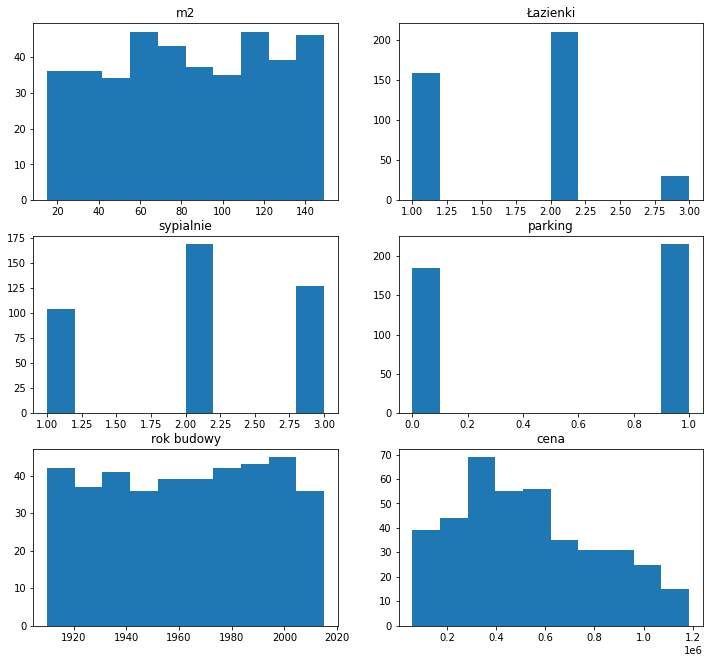

In [30]:
##############################
# TODO: Investigate the data #
##############################

import matplotlib.pyplot as plt

plt.figure(figsize = (12, 15))

plt.subplot(4, 2, 1)
plt.hist(total['m2'])
plt.title('m2')

plt.subplot(4, 2, 2)
plt.hist(total['ilość_łazienek'])
plt.title('Łazienki')

plt.subplot(4, 2, 3)
plt.hist(total['ilość_sypialni'])
plt.title('sypialnie')

plt.subplot(4,2,4)
plt.hist(total['parking_podziemny'])
plt.title('parking')

plt.subplot(4, 2, 5)
plt.hist(total['rok_budowy'])
plt.title('rok budowy')

plt.subplot(4, 2, 6)
plt.hist(total['cena'])
plt.title('cena')

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is de

Text(0, 0.5, 'cena')

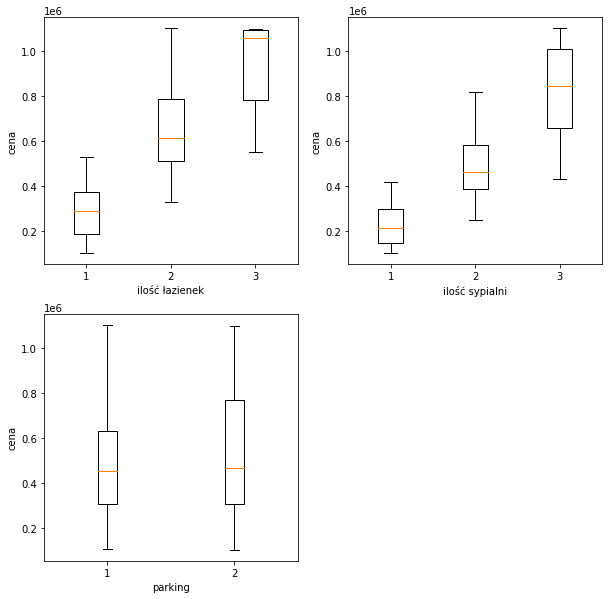

In [31]:
_ = plt.figure(figsize = (10, 10))

plt.subplot(2, 2, 1)
_ = plt.boxplot([train['cena'].loc[train['ilość_łazienek'] == 1],
             train['cena'].loc[train['ilość_łazienek'] == 2],
             train['cena'].loc[train['ilość_łazienek'] == 3]])
plt.xlabel('ilość łazienek')
plt.ylabel('cena')

plt.subplot(2, 2, 2)
_ = plt.boxplot([train['cena'].loc[train['ilość_sypialni'] == 1],
             train['cena'].loc[train['ilość_sypialni'] == 2],
             train['cena'].loc[train['ilość_sypialni'] == 3]])
plt.xlabel('ilość sypialni')
plt.ylabel('cena')

plt.subplot(2, 2, 3)
_ = plt.boxplot([train['cena'].loc[train['parking_podziemny'] == 0],
             train['cena'].loc[train['parking_podziemny'] == 1]])
plt.xlabel('parking')
plt.ylabel('cena')